In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data 1
years = pd.read_csv('data/numberOfSuicidesInYears.csv', encoding='UTF-8', sep = ';')
method = pd.read_csv('data/method.csv', sep=';', encoding='UTF-8')
sex_city = pd.read_csv('data/sex_city.csv', sep=';', encoding='UTF-8')

In [ ]:
years = years.iloc[: , 2:-1]
years = years.transpose()
years.reset_index(inplace=True)
years.rename(columns={'index': 'year', 0:'value'}, inplace=True)

In [ ]:
years.head()

,year,value
0,ogółem;ogółem;2018;[osoba],11167
1,ogółem;ogółem;2019;[osoba],11961
2,ogółem;ogółem;2020;[osoba],12013
3,ogółem;ogółem;2021;[osoba],13798
4,ogółem;ogółem;2022;[osoba],14520


In [ ]:
# rename data columns(remove junk) and split data
years.loc[:, 'year'] = years['year'].str.replace(';[osoba]', '', regex=False).str.replace('ogółem;', '', regex=False).str.replace('12 lat i mniej', '≤ 12', regex=False).str.replace('70 lat i więcej', '≥ 70', regex=False)
years_attempt = years.iloc[0:40, :].reset_index(drop=True)
years_died = years.iloc[45:85, :].reset_index(drop=True)
years_died.loc[:, 'year'] = years_died['year'].str.replace('zakończone zgonem;', '', regex=False)

In [ ]:
years_died.head()

,year,value
0,2018,5182
1,2019,5255
2,2020,5165
3,2021,5201
4,2022,5108


#**1. At what age do people most often attempt suicide?**

---



In [ ]:
# select data from 2018 and 2022
df_filtered = years_attempt[years_attempt.year.str.contains('2022')].reset_index(drop=True)
df_filtered = df_filtered.copy()
df_filtered.loc[:, 'year'] = df_filtered['year'].str.replace(';2022', '', regex=False)
age_attempts_2022 = df_filtered.iloc[1:]

df_filtered = years_attempt[years_attempt.year.str.contains('2018')].reset_index(drop=True)
df_filtered = df_filtered.copy()
df_filtered.loc[:, 'year'] = df_filtered['year'].str.replace(';2018', '', regex=False)
age_attempts_2018 = df_filtered.iloc[1:]

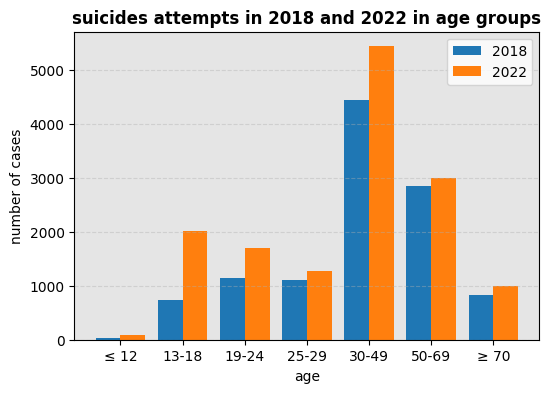

In [ ]:
plt.figure(figsize=(6, 4))
X_axis = np.arange(len(age_attempts_2018.year))
plt.bar(X_axis-0.2, age_attempts_2018.value, width=0.4, label=2018)
plt.bar(X_axis+0.2, age_attempts_2022.value, width=0.4, label=2022)
plt.title('suicides attempts in 2018 and 2022 in age groups', fontweight='bold')
plt.xticks(X_axis, age_attempts_2018.year)
plt.legend()
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('#e5e5e5')
plt.xlabel('age')
plt.ylabel('number of cases')
plt.show()

The age group with the highest number of suicide attempts is the 30-49 age group. Nevertheless, it can be seen that in the comparison of 2022 to 2018, there was an increase in suicide attempts in every age group. From the chart, you can see that the group where the increase was greatest was the 13-18 age group (teenagers).

# How changed a number of suicieds attempts in previous years in a group of the youngest people?

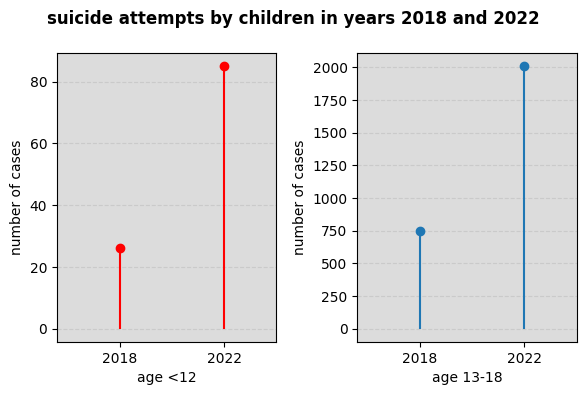

In [ ]:
# creating subplots
categories = ['2018', '2022']
x = np.arange(2)

plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.stem(categories, [age_attempts_2018.value.iloc[0], age_attempts_2022.value.iloc[0]], 'r', basefmt=' ')
plt.subplots_adjust(top=1)
plt.xlim(-0.6, 1.5)
plt.xlabel('age <12')
plt.ylabel('number of cases')
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('gainsboro')

plt.subplot(1, 2, 2)
plt.stem(categories, [age_attempts_2018.value.iloc[1], age_attempts_2022.value.iloc[1]], basefmt=' ')
plt.xlim(-0.6, 1.5)
plt.xlabel('age 13-18')
plt.ylabel('number of cases')
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('gainsboro')

plt.suptitle('suicide attempts by children in years 2018 and 2022', fontweight='bold')
plt.tight_layout(pad=1.2)
plt.show()

The number of children under the age of 12 attempting to kill themselves almost

quadrupled between 2018 and 2022 :( In contrast, the number of suicide attempts among teenagers more than doubled. There were about 2,000 suicide attempts. This is a very short period, but a very large increase in attempts.

The main reasons why young people try to kill themselves are loneliness, lowered self-esteem, family problems and depression.

In Poland, mainly due to a very bad system of psychological help for young people, more and more of them can't cope with life and try to kill themselves.


# How chagned overal number of suicide attempts in previous years?

In [ ]:
# preparing data
data = years_attempt.iloc[:5]

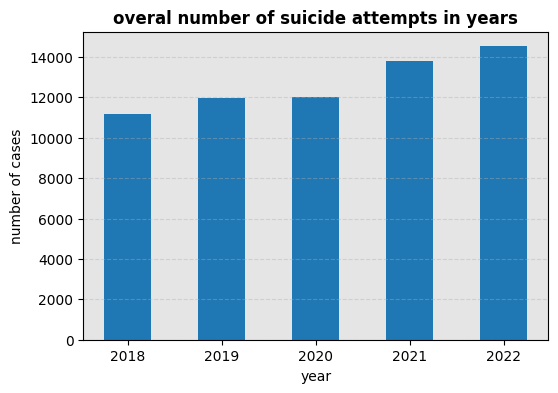

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(data.year, data.value, width = 0.5)
plt.xticks(data.year)
plt.title('overal number of suicide attempts in years', fontweight='bold')
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('#e5e5e5')
plt.xlabel('year')
plt.ylabel('number of cases')
plt.show()

The number of suicides (suicide attempts and fatal suicides) is increasing year after year.

# **What method was the most common?**

In [ ]:
# preparing data about method of sucide - renaming columns, remove junk
method = method.transpose()
method = method.iloc[2:-1].reset_index()
method.rename(columns={'index': 'year', 0:'value'}, inplace=True)
method.loc[:, 'year'] = method['year'].str.replace(';[osoba]', '', regex=False).str.replace('ogółem;', '', regex=False)
# select data from 2022
method_2022 = method[method.year.str.contains('2022')].reset_index(drop=True)
method_2022.rename(columns={'index': 'year', 0:'value'}, inplace=True)
method_2022.loc[:, 'year'] = method_2022['year'].str.replace(';2022', '', regex=False)

In [ ]:
# rename values from polish to english
method_2022_all = method_2022.iloc[:13].set_index('year').transpose()
method_2022_all.rename(columns={'zatrucie gazem / spalinami': 'gas/fumes poisoning','zatrucie środkami chemicznymi / toksycznymi':'poisoning by chemical/toxic agents', 'zażycie środków nasennych / leków psychotropowych': 'taking sleeping pills/psychotropic drugs', 'zażycie innych leków':'taking other drugs', 'uszkodzenie układu krwionośnego':'damage to the bloodstream', 'samookaleczenie powierzchniowe':'surface self-injury', 'rzucenie się z wysokości':'throwing oneself from a height', 'utonięcie / utopienie się':'drowning', 'powieszenie się':'hang oneself', 'rzucenie się pod pojazd ruchu':'throwing oneself under a vehicle', 'zastrzelenie się / użycie broni palnej':'shooting oneself/using a gun', 'uduszenie się':'suffocation', 'samopodpalenie':'self-immolation'}, inplace=True)
method_2022_all = method_2022_all.transpose()
method_2022_all.reset_index(inplace=True)

In [ ]:
# count frequency
method_2022_all_sort = method_2022_all.sort_values(by=['value'])
value_sum = method_2022_all['value'].sum()
method_2022_all_sort['value'] = method_2022_all_sort['value'] / value_sum * 100

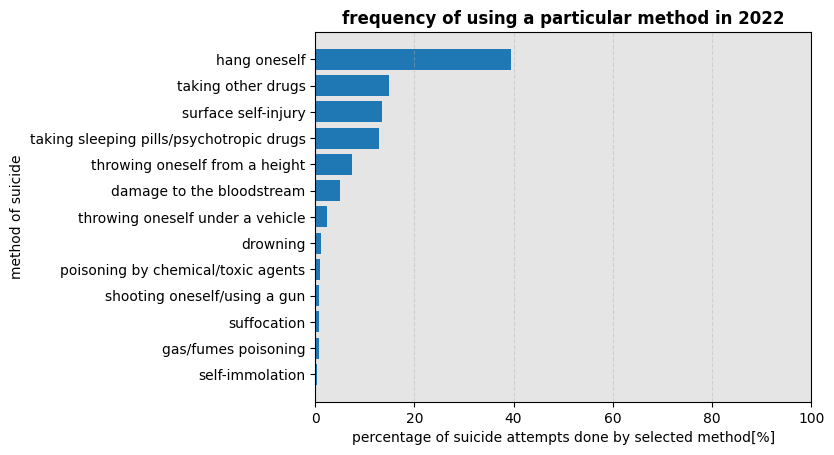

In [ ]:
plt.barh(method_2022_all_sort.year, method_2022_all_sort.value)
plt.title("frequency of using a particular method in 2022", fontweight='bold')
plt.grid(axis='x', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('#e5e5e5')
plt.xlabel('percentage of suicide attempts done by selected method[%]')
plt.ylabel('method of suicide')
plt.xlim(0, 100)
plt.show()

The most common method was hanging oneself. Second popular method get taking other drugs, third method was surface self-injury.

# **Which method was the most effective?**

In [ ]:
# select data about deaths in 2022
dead_22 = method_2022.iloc[14:-1, 1].reset_index(drop=True)
effectiveness = method_2022_all

In [ ]:
# count effectivness
effectiveness['value'] = dead_22 / method_2022_all['value'] * 100
effectiveness = effectiveness.sort_values(by=['value'])

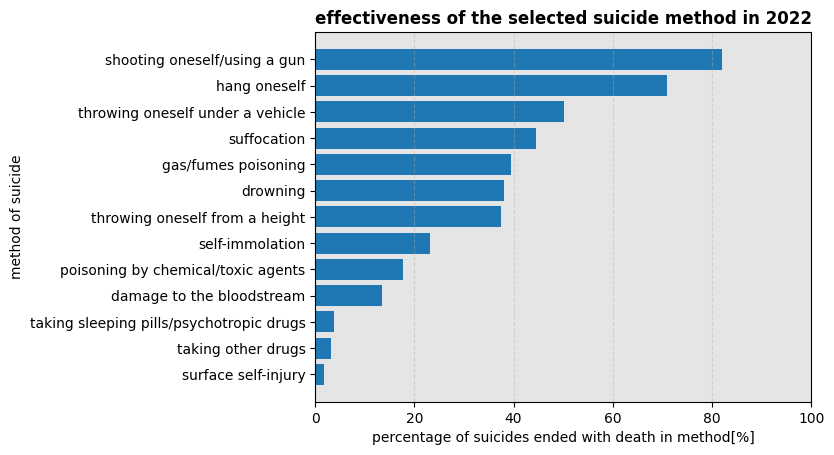

In [ ]:
plt.barh(effectiveness.year, effectiveness.value)
plt.title("effectiveness of the selected suicide method in 2022", fontweight='bold')
plt.grid(axis='x', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('#e5e5e5')
plt.xlabel('percentage of suicides ended with death in method[%]')
plt.ylabel('method of suicide')
plt.xlim(0, 100)
plt.show()

Hanging oneself was the most common and also one of the most effective method. Taking other drugs was quite common but it's rather not effective.

# **Who more often attempt a suicide? Women or men?**

In [ ]:
# remove junk, rename columns, select needed rows
sex_city = sex_city.transpose()
sex_city.reset_index(inplace=True)
sex_city.rename(columns={'index': 'year', 0:'value'}, inplace=True)
sex_city.loc[:, 'year'] = sex_city['year'].str.replace(';[osoba]', '', regex=False).str.replace(';[osoba]', '', regex=False).str.replace('ogółem;', '', regex=False)
sex_city = sex_city.iloc[2:-11,:].reset_index(inplace=False, drop=True)

In [ ]:
# select data
male = sex_city[sex_city.year.str.startswith('mężczyźni')].reset_index(drop=True)
female = sex_city[sex_city.year.str.startswith('kobiety')].reset_index(drop=True)
general = sex_city[sex_city.year.str.startswith('20')].reset_index(drop=True)
male_dead = sex_city[sex_city.year.str.startswith('zakończone zgonem;mężczyźni')].reset_index(drop=True)
female_dead = sex_city[sex_city.year.str.startswith('zakończone zgonem;kobiety')].reset_index(drop=True)
general_dead = sex_city[sex_city.year.str.startswith('zakończone zgonem;20')].reset_index(drop=True)
city = sex_city[sex_city.year.str.startswith('miasto')].reset_index(drop=True)
village = sex_city[sex_city.year.str.startswith('wieś')].reset_index(drop=True)

In [ ]:
# count mean of suicide attempts in 2018-2022
sizes = [male.value.mean(), female.value.mean()]
labels = ["men", "women"]

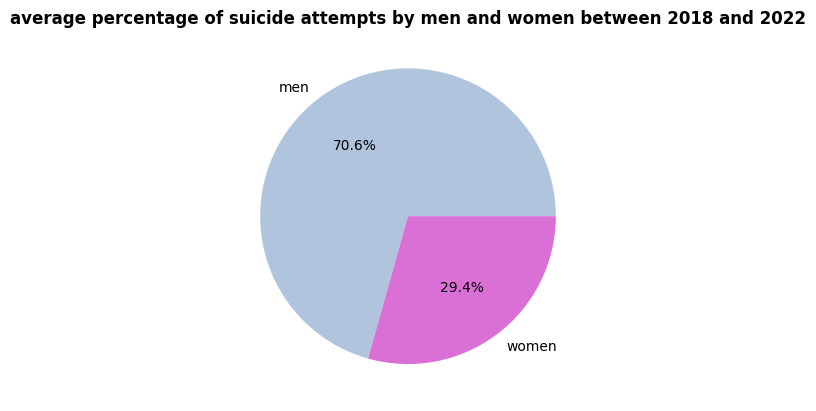

In [ ]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightsteelblue', 'orchid'])
plt.title("average percentage of suicide attempts by men and women between 2018 and 2022", fontweight="bold")
plt.show()

Men tries to die two times more often than women.

# **How looks number of women and men cases in years?**




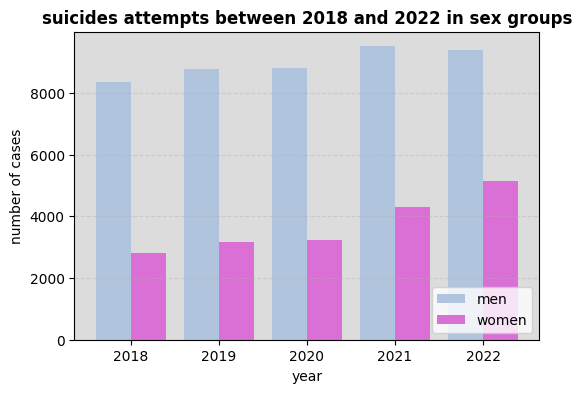

In [ ]:
plt.figure(figsize=(6, 4))
X_axis=np.arange(2018, 2023, 1)
plt.bar(X_axis-0.2, width=0.4, height=male.value, label='men', color = 'lightsteelblue')
plt.bar(X_axis+0.2, width=0.4, height=female.value, label='women', color = 'orchid')
plt.xlabel('year')
plt.ylabel('number of cases')
plt.title('suicides attempts between 2018 and 2022 in sex groups', fontweight="bold")
plt.xticks(X_axis)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('gainsboro')
plt.show('bottom')

Number of men is similar level but number of women is rising.

# **Who is more effective at killing themselves? Men or women?**

In [ ]:
# count effectivness
male_dead_index = male_dead.value/male.value*100
female_dead_index = female_dead.value/female.value*100

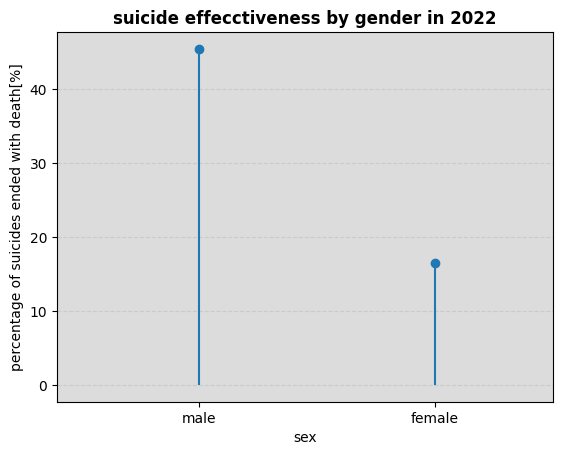

In [ ]:
categories = ['male', 'female']
x = np.arange(len(categories))

plt.stem(categories, [male_dead_index.iloc[-1], female_dead_index.iloc[-1]], basefmt=' ')
plt.title('suicide effecctiveness by gender in 2022', fontweight='bold')
plt.xlim(-0.6, len(categories) - 0.5)
plt.xlabel('sex')
plt.ylabel('percentage of suicides ended with death[%]')
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('gainsboro')
plt.show()

Men more often tries killing themselves and more often do it effective, twice more effective than women. Men tring to die has almost 50% chance to die. In women its only 15% chance.

# **Where people more often try to die? In city or in village?**

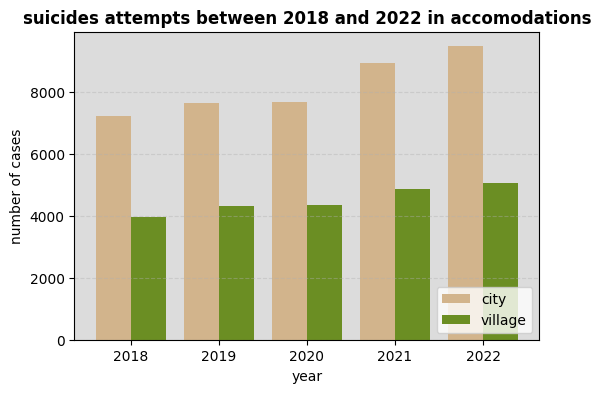

In [ ]:
plt.figure(figsize=(6, 4))
X_axis=np.arange(2018, 2023, 1)
plt.bar(X_axis-0.2, width=0.4, height=city.value, label='city', color = 'tan')
plt.bar(X_axis+0.2, width=0.4, height=village.value, label='village', color = 'olivedrab')
plt.xlabel('year')
plt.ylabel('number of cases')
plt.title('suicides attempts between 2018 and 2022 in accomodations', fontweight="bold")
plt.xticks(X_axis)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='dashed', alpha=0.4)
plt.gca().set_facecolor('gainsboro')
plt.show('bottom')

Number of suicides in village is rising but slowly, in cities this amout is rising much faster. In cities this problem is bigger than in village.